DC Housing Properties

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#set low_memory=False

In [3]:
import os
print(os.getcwd())

C:\Users\GBTC408010ur\Downloads\datasets


In [4]:
filepath = "./DC_Properties.csv" #./rows.json
df = pd.read_csv(filepath)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
#check if any missing values in the data
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [6]:
#descriptive statistics
df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

In [7]:
#fill na and assign mean value
df['PRICE']=df['PRICE'].fillna(value = df['PRICE'].mean())

#print(os.getcwd()))

In [8]:
df['PRICE'].isnull().sum()  #sum of all that is null

0

In [9]:
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                 158957
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [10]:
#Method 1: manual calculation of z-scores for 'Price' column

#mean for the column
mean = df['PRICE'].mean()

#standard deviation of the column
std = df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (df['PRICE'] - mean)/std


In [11]:
mean, std  #mean and standard deviation

(931351.5949342768, 5550558.004606821)

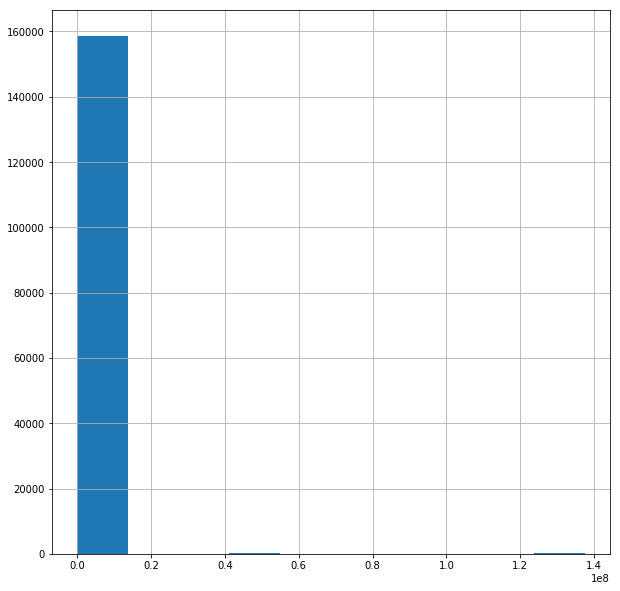

In [12]:
#plot the frequency count for each column
df['PRICE'].hist(figsize=(10,10))

In [13]:
#first 5 rows of z-score standardized 'Price' column
#z scores is the second column - ar commment
price_z_manual.head()

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [14]:
#method 2 : use scrikit-learn to calculate z-scores
#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(df[['PRICE']])





In [15]:
price_zscore.mean(), price_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [16]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(price_zscore.reshape(-1))

In [17]:
#first 5 rows of z-score standardized price column
price_z_col.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

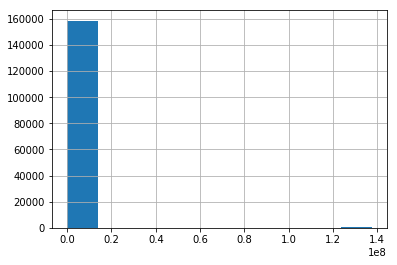

In [49]:
#BEFORE: frequency count plot of 'price' column
df['PRICE'].hist()

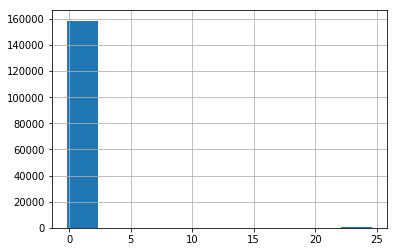

In [48]:
#AFTER: frequency count plot of 'Price' column (z-score standardization)
#range is much smaller
price_z_col.hist()